# Unit 2 Assessment - Monte Carlo Simulations

## Instructions

In this assessment, you are going to investigate models that use random numbers. 

Scores are determined by:

- Successfully starting the C Level = 50 pts
- Perfectly completing the C Level = 75 pts
- Perfectly completing the B and C Levels = 85 pts
- Perfectly completing the A, B, and C Levels = 100 pts

You may use your Colab notebooks, our textbook, my notebook solutions, and any links to web sites I provide. Basically, if it is linked on Blackboard you can use it. (You may not use any other person or web site or book or resource (including any ChatGPT-like resource), in general.) 

You may ask me for help **once**; however, you may ask for clarification as often as needed.

Add additional cells for both code and markdown as needed. **Write answers to questions in narrative form in markdown.** You may print values you need in your code, and then use these values in a written response.

All graphs should have correct titles and axis labels (with units).

## Grade

<font color="green"></font>

Level | Grade | Comment
--- | --- | ---
C (75 pts) | | 
B (10 pts) | | 
A (15 pts) | | 
Total | 


# Level C

## Exercise 0

1. Save a copy of this notebook to Google Drive. Have you already shared your Google Colabortory folder with "hpuphysicsdepartment@gmail.com"? If not, then be sure to share your folder.

2. Add a text cell above and type your name as a level one heading in markdown. (A level one heading starts with # on its own line.)

3. Run the `import` statements below to add packages.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib.ticker import MaxNLocator
import random as rand

## Exercise 1

Dice are commonly refered to just by the letter "d" followed by the number of sides they have. A six sided dice is a "d6" and a twelve sided dice is a "d12". **In the cell below write the code to simulate the roll of a d6 and print the result.**

In [2]:
roll = rand.randint(1,6)
print("We rolled a ", roll)

We rolled a  2


## Exercise 2

In many tabletop roleplaying games, one of the most common dice used is a d20. Copy your solution to Exercise 1 into the code cell below and modify it to **simulate the roll of a d20 and print the result.**

In [3]:
roll = rand.randint(1,20)
print("We rolled a ", roll)

We rolled a  5


## Exercise 3

Often times in tabletop roll playing games, multiple dice are rolled together and something happens based on the sum. The number of dice to roll and add together is indicated by a number before "d". So rolling two d20 would be written 2d20. **In the cell below write the code to simulate the roll of 2d6 and print their sum.**


In [7]:
rollA = rand.randint(1,6)
rollB = rand.randint(1,6)
print("We rolled a ", rollA + rollB)

We rolled a  15


## Exercise 4

Suppose you have a coin that is not fair. Rather than having a 50% chance to come up as "heads" when flipped, it comes up "heads" 60% of the time. Modify the program below to adjust the probability of heads coming up to 60%. 

In [9]:
coin_flip = rand.random()
if coin_flip < 0.6:
    print("Heads!")
else: 
    print("Tails!")

Heads!


## Exercise 5

We have seen a few ways to estimate the irrational number $\pi$ using a Monte Carlo simulation. $\pi$ is not the only important irrational number that crops up all over the place in statistics and mathmatics. The other big player is [$e$](https://en.wikipedia.org/wiki/E_(mathematical_constant)). It is sometimes called the natural number (it's the base of the natural logarithm $\ln$) or Euler's number and has a value of approximatly $2.718$. You've seen $e$ before in the definition of a Gaussian distribution. 

Like $\pi$ we can estimate its value using a Monte Carlo simulation. Unfortunatly, unlike most ways of estimating $\pi$ there is not an good geometric interpretation of this method. Instead, we will exploit the fact that if we generate a series of random numbers, all between $[0, 1)$, you need to  add (on average) $e$ random numbers before  the sum exceeds 1. 

Here are the steps we will take to estimate $e$:

1. Generate random numbers between $[0,1)$ and add them together until the sum is larger than 1.
1. Save the number of random numbers we needed to add together. 
1. If we repeat this process (or trial) many times, the average of the number of random numbers we needed to add together is our estimate for $e$.

I have written the model to do this below.

In [37]:
N = 100000 # Number of trials to perform

Ntot = 0 # Sum of the number of random numbers we needed to add together to reach 1. 

for i in range(N):
    sum = 0
    num_added = 0
    while sum < 1:
        sum = sum + rand.random()
        num_added = num_added + 1
    # Our sum has now exceeded 1, so save the total number of random numbers we added
    Ntot += num_added

avg_added = Ntot/N
print(f"Our estimate for e is: {avg_added}")

Our estimate for e is: 2.71583


**What change would you need to make to the model to increase the accuracy of your estimation?** Make whatever modifications are necessary to the model to increase the accuracy of your estimation for $e$ and then **compare your new estimate to the more accurate estimation** of $e = 2.71828183$

To increase the accuracy of the estimation, we need to increase the number of trials. If we increase the number of trials to $100,000$ our new estimate is $e \approx 2.71583$ which is accurate to 2-3 decimal places.

---
# Level B



A club on HPU's campus has decided to run a fundraiser and they need to earn $2000 to launch a new innitiative on campus. It's already been decided that the fundraiser is going to be based on the old [Pinko](https://priceisright.fandom.com/wiki/Plinko) game from The Price Is Right. Your job is to model the game and predict the expected earnings of the fundraiser. This game is a version of a Galton Board. A video of one of these boards in actions, along with a brief description of the model we are developing here, can be found in the introduction to [Grant Sanderson's video on the Central Limit Theorem](https://www.youtube.com/watch?v=zeJD6dqJ5lo&t=113s). A shorter video of just the board can be found [here](https://youtu.be/EvHiee7gs9Y?t=9).

In the fundraiser, people will buy balls to drop down the Galton board. They will win an amount of money that depends on where the ball lands at the base of the board. The base of the board is broken up into four colored section: purple, red, green, and blue. Each section pays out a different amount of money.

As the ball falls, it bounces off pegs in the board. We will assume that after hitting a peg, the ball will either bounce one unit of distance to the right or one unit of distance to the left. The board is constructed so the falling ball hits 10 pegs before reaching the base of the board.

We can model the fall of each ball as a random walk, which each step in the walk represents the ball bounding off a peg in a row. We can track the position of the ball as it falls starting at the origin `x=0`. As it falls, it has a 50% chance of bouncing right and a 50% chance of bouncing left. We then update the position of the ball depending on the result. After bouncing 10 times we record the final position of the ball. 

I have written most of the model for you below. Run the code. The output is a histogram showing where each ball hit the base of the board. Look at the output and make sure you understand what it is showing. Then read over the code and answer the questions below.

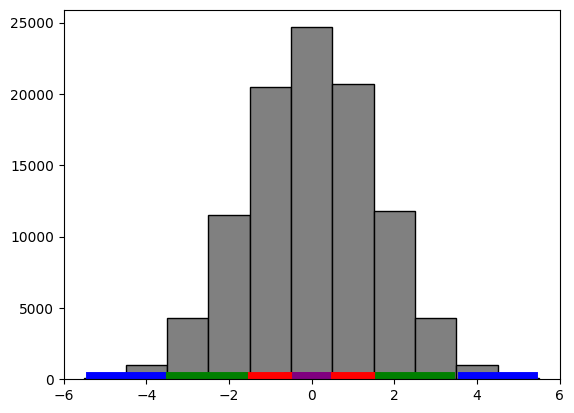

Gross = $532000.00
Loss = $332180.00
Profit = $199820.00
Profit per ball drop = $2.00


In [53]:
Nball = 100000 #Number of trials 
L = 1 # Distance between pegs
P = 5.32 # Price of a ball drop
Nstage = 10 # Number of levels the ball will bounce down

final_pos = [] # Final positions of all the balls

Ppurple = 10
Pred = 0
Pgreen = 2
Pblue = 10

Npurple = 0
Nred = 0
Ngreen = 0
Nblue = 0

# Function to simulate dropping a ball down the Plinko game
# Returns the final position of the ball that fell.
def drop_ball():
    Nstage
    x = 0 # Initial position of the ball
    for i in range(Nstage):
        dir = rand.randint(0,1)
        if dir == 0:
            x = x + L/2
        else:
            x = x - L/2
    return x


for i in range(Nball):
    pos = drop_ball()
    if np.abs(pos) == 0:
        Npurple = Npurple + 1
    elif np.abs(pos) == 1:
        Nred = Nred + 1
    elif np.abs(pos) == 2 or np.abs(pos) == 3:
        Ngreen = Ngreen + 1
    else:
        Nblue = Nblue + 1

    final_pos.append(drop_ball())

# Display the data in a histogram and draw lines to represent the different color regions
plt.xlim(-6,6)

bins = np.linspace(-5.5,5.5,12)
histogram = plt.hist(final_pos, bins=bins, facecolor='gray',edgecolor='black', align='mid', range=(-5,5))
plt.plot([-0.5,0.5],[0,0], linewidth=10, color='purple')
plt.plot([-1.5,-0.5],[0,0], linewidth=10, color='red')
plt.plot([1.5,0.5],[0,0], linewidth=10, color='red')
plt.plot([1.7,3.3],[0,0], linewidth=10, color='green')
plt.plot([-1.7,-3.5],[0,0], linewidth=10, color='green')
plt.plot([-5.3,-3.7],[0,0], linewidth=10, color='blue')
plt.plot([5.3,3.7],[0,0], linewidth=10, color='blue')
plt.plot([-0.3,0.3],[0,0], linewidth=10, color='purple')
plt.show()

gross = P*Nball
loss = Ppurple*Npurple + Pred*Nred + Pblue*Nblue + Pgreen*Ngreen
profit = gross - loss
ppd = profit/Nball

print(f"Gross = ${gross:.2f}")
print(f"Loss = ${loss:.2f}")
print(f"Profit = ${profit:.2f}")
print(f"Profit per ball drop = ${ppd:.2f}")


## Exercise 1

After reading the code, answer the following questions (remember to answer in **full sentances**):

(a) How many balls are being dropped in the initial model? What is the name of the variable that represents the number of balls dropped?

100 balls are beain dropped, and the variable that represents that is `Nball`.

(b) How much are we charging for each ball drop? What is the name of the variable that represents the price of a single ball drop?

We are charging $5 for each ball drop. The variable that represents that is `P`.

(c) How much do we payout to a player who's ball lands in purple? What is the name of the variable that represents the payout for purple?

We payout $10 to someone whose ball lands in purple. The variable that represents this payout is `Ppurple`.

(d) Fill out the rest of this markdown table with the payout and variable name for each of the colors (you do not need full sentaces in the table).

|Color| Payout ($) | Variable Name|
|:---:|---:|---:|
|Purple| 10 | `Ppurple`|
|Red|  0| `Pred`|
|Green| 2|`Pgreen` |
|Blue| 10 | `Pblue`|


## Excercise 2

Add code at the end of the model above to calculate and print the profit per ball drop. What is the profit per ball drop? How much does it vary each time you run the model?

The profit per ball drop is about $2.04. It varies by more than $0.50.


## Exercise 3

Modify the model to reduce that variation and calculate the **expected** profit per ball drop. What is the expected profit per ball drop? How much does it vary each time you run the model?

The expected profit per ball drop $1.68. Increasing the number of balls dropped to $100,000$ reduces the uncertainty to a few cents.


## Exercise 4

How many balls do we need to sell to reach our goal of making $2000 in profit? You can use your answer from Exercise 2 and do not need to modify your model to answer this question.

We will need to sell 1,191 ball drops.


## Exercise 5

Chloe has been working on some marketing research for the fundraiser and thinks it is likely only 1000 throws will be sold. What is the required **expected** profit per ball to reach our goal of raising $2000? How much do we have to charge per ball to reach that expected profit?

To reach our goal we would need an expected profit of $2.00 per ball drop. We will need to charge \$5.32 per ball drop to make \$2.00 in profit.

# Level A



Your roommate has joined the [Dungons and Dragons (D&D) club on campus](https://involved.highpoint.edu/organization/ttrpg) and decided to play as a Wizard. Overwelmed with all the spell options, they've come to you for help. Knowing you are in this class, they've asked you to help them model out part of a combat encounter. They've identified two spells in particular and want to know which spell will, on average, damage a single enemy more. The two spells are [Magic Missile](http://dnd5e.wikidot.com/spell:magic-missile) and [Thunderwave](http://dnd5e.wikidot.com/spell:thunderwave).

Magic Missile is one of the simplest spells in D&D, it launches three darts at an enemy that are gaurunteed to hit, each of which do 1d4 damage (for a total of 3d4 damage). 

Thunderwave is a little more complicated. Most spells in D&D require sucessfully passing some kind of check before the spell can proceed. These checks always involve rolling of a d20. In the case of thunderwave, the spell always hits with 2d8 damage, but the enemy has a chance to dodge half of that damage. To check if the enemy sucessfully dodges, the enemy rolls a d20 and adds their Dexterity modifier to their roll. The dexterity modifier is a fixed number between -5 and +5 that represents how dexterous they are. Their total is then compared to the number 12 (your roommate's spell save DC). If the enemy's roll is less than 12 they take the full damage. Otherwise they take half the damage.

Defined below are two functions which calculate and return the damage for each spell.
- `magic_missile()`: returns the damage done by magic missile
- `thunderwave(dex_modifier)`: returns the damage done by thunderwave given the enemy's `dex_modifier`.

Run the cell to define the functions.

In [55]:
def magic_missile():
    damage = 0
    for i in range(3):
        damage = damage + rand.randint(1,4)
    return damage

def thunderwave(dex_modifier):
    damage = 0
    for i in range(2):
        damage = damage + rand.randint(1,8)
    
    roll = rand.randint(1,20) + dex_modifier
    if roll >= 12:
        damage = damage/2
    return damage


Below are some examples showing how to use each of the functions

In [56]:
damage = magic_missile()

print(f"Magic Missile did {damage} points of damage.")

Magic Missile did 7 points of damage.


In [71]:
dex_modifier = 0
damage = thunderwave(dex_modifier)

print(f"The enemy has a dextarity modifier of {dex_modifier}")
print(f"Thunderwave did {damage} points of damage")

The enemy has a dextarity modifier of 0
Thunderwave did 8 points of damage


# Exercise 1

Write a program to calculate the **expected** damage done by Magic Missile (we calculated an average in the last section of Level C).

In [91]:
N = 100000
sum = 0
for i in range(N):
    sum = sum + magic_missile()

damage = sum/N
print("The average damage done by magic missile is {:.3f}".format(damage))

The average damage done by magic missile is 7.506


# Exercise 2

Copy your program from above and modify it to calculate the average damage of thunderwave for an enemy with a dexterity modifier of 0. Then calculate the average damage for enemies with a dexterity modifiers of -5 to +5 (the modifier must be an integer). You do not need to write a new program for each of the dexterity modifiers, just modify your existing program.

Fill out the rest of this table with your results. What is the highest dexterity modifier the enemy can have and Thunderwave still do more damage, on average?

|Dex Modifier|Average Damage|
|:---:|:----:|
| -5 | 8.11|
| -4 | 7.88|
| -3 | 7.66|
| -2 | 7.41|
| -1 | 7.22|
| 0  | 6.97|
| +1 | 6.75|
| +2 | 6.52|
| +3 | 6.29|
| +4 | 6.07| 
| +5 | 5.85|

Thunderwave will do more damage, on average, as long as the enemies dexterity modifier is less than or equal to -3.

In [94]:
N = 100000
for dex_mod in range(-5,6):
    sum = 0
    for i in range(N):
        sum = sum + thunderwave(dex_mod)

    damage = sum/N
    print("The average damage done by Thunderwave with a dex modifier of {} is {:.3f}".format(dex_mod, damage))

The average damage done by Thunderwave with a dex modifier of -5 is 8.106
The average damage done by Thunderwave with a dex modifier of -4 is 7.882
The average damage done by Thunderwave with a dex modifier of -3 is 7.655
The average damage done by Thunderwave with a dex modifier of -2 is 7.415
The average damage done by Thunderwave with a dex modifier of -1 is 7.219
The average damage done by Thunderwave with a dex modifier of 0 is 6.967
The average damage done by Thunderwave with a dex modifier of 1 is 6.750
The average damage done by Thunderwave with a dex modifier of 2 is 6.524
The average damage done by Thunderwave with a dex modifier of 3 is 6.290
The average damage done by Thunderwave with a dex modifier of 4 is 6.077
The average damage done by Thunderwave with a dex modifier of 5 is 5.850
